In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from tensorflow import keras
from keras.layers import Dense
from keras.models import Sequential, load_model

# Load your cleaned dataset (replace 'cleaned_dataset.csv' with the actual file name)
df_cleaned = pd.read_csv('cleaned_dataset.csv')

# Assuming 'target' is the column you want to predict
target_column = 'Prediction'

# Split the dataset into features (X) and target variable (y)
X = df_cleaned.drop(columns=[target_column])
y = df_cleaned[target_column]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data (important for neural networks)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the Neural Network model
model = Sequential()

# Add input layer and first hidden layer
model.add(Dense(units=64, activation='relu', input_dim=X_train.shape[1]))

# Add output layer
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model on the training set
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Make predictions on the test set
y_pred_prob = model.predict(X_test)
y_pred = [1 if prob >= 0.5 else 0 for prob in y_pred_prob]

# Evaluate the performance of the classifier
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)


Epoch 1/10
104/104 [==============================] - 6s 6ms/step - loss: 0.2303 - accuracy: 0.9226 - val_loss: 0.1335 - val_accuracy: 0.9601
Epoch 2/10
104/104 [==============================] - 0s 4ms/step - loss: 0.0752 - accuracy: 0.9758 - val_loss: 0.0954 - val_accuracy: 0.9638
Epoch 3/10
104/104 [==============================] - 0s 4ms/step - loss: 0.0498 - accuracy: 0.9855 - val_loss: 0.0882 - val_accuracy: 0.9662
Epoch 4/10
104/104 [==============================] - 0s 4ms/step - loss: 0.0362 - accuracy: 0.9906 - val_loss: 0.0846 - val_accuracy: 0.9686
Epoch 5/10
104/104 [==============================] - 0s 4ms/step - loss: 0.0285 - accuracy: 0.9918 - val_loss: 0.0831 - val_accuracy: 0.9710
Epoch 6/10
104/104 [==============================] - 0s 4ms/step - loss: 0.0209 - accuracy: 0.9964 - val_loss: 0.0832 - val_accuracy: 0.9710
Epoch 7/10
104/104 [==============================] - 0s 5ms/step - loss: 0.0181 - accuracy: 0.9952 - val_loss: 0.0864 - val_accuracy: 0.9674
Epoch 

In [ ]:
!pip install keras==2.12.0

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from tensorflow import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import Adam

# Load your cleaned dataset (replace 'cleaned_dataset.csv' with the actual file name)
df_cleaned = pd.read_csv('cleaned_dataset.csv')

# Assuming 'target' is the column you want to predict
target_column = 'Prediction'

# Split the dataset into features (X) and target variable (y)
X = df_cleaned.drop(columns=[target_column])
y = df_cleaned[target_column]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the base model for KerasClassifier
def create_model(learning_rate=0.001, units=64):
    model = Sequential()
    model.add(Dense(units=units, activation='relu', input_dim=X_train.shape[1]))
    model.add(Dense(units=1, activation='sigmoid'))

    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

    return model

# Wrap the Keras model in a scikit-learn classifier
keras_model = KerasClassifier(build_fn=create_model, epochs=10, batch_size=32, verbose=0)

# Define the hyperparameter grid to search
param_grid = {
    'learning_rate': [0.001, 0.01, 0.1],
    'units': [32, 64, 128],
}

# Create a GridSearchCV object
grid = GridSearchCV(estimator=keras_model, param_grid=param_grid, cv=3, scoring='accuracy')

# Perform the grid search
grid_result = grid.fit(X_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_result.best_params_)

# Make predictions on the test set using the best model
y_pred_prob = grid_result.best_estimator_.predict(X_test)
y_pred = [1 if prob >= 0.5 else 0 for prob in y_pred_prob]

# Evaluate the performance of the best model
result_accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the results
print(f"Accuracy: {result_accuracy:.2f}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)


<ipython-input-2-2e7bdb7c7a09>:41: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  keras_model = KerasClassifier(build_fn=create_model, epochs=10, batch_size=32, verbose=0)


44/44 [==============================] - 0s 2ms/step
Best Hyperparameters: {'learning_rate': 0.01, 'units': 128}
33/33 [==============================] - 0s 2ms/step
Accuracy: 0.96
Confusion Matrix:
 [[717  22]
 [ 18 278]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.97      0.97       739
           1       0.93      0.94      0.93       296

    accuracy                           0.96      1035
   macro avg       0.95      0.95      0.95      1035
weighted avg       0.96      0.96      0.96      1035



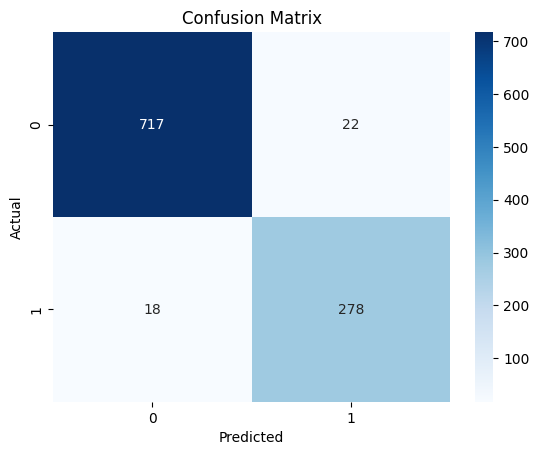

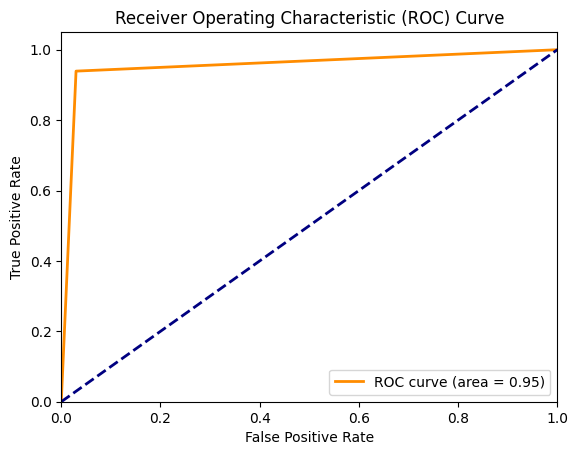

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc

# Visualize Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Visualize ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()
